In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
import matplotlib.pyplot as plt

# Download NLTK data if not already present
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sanskarsrivastava/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanskarsrivastava/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sanskarsrivastava/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Step 1: Load and filter the dataset
# Loading the 20 Newsgroups dataset and filter only science-related categories

categories = ['sci.med', 'sci.space', 'sci.electronics', 'sci.crypt']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)
data = newsgroups.data  
target = newsgroups.target 

In [3]:
# Step 2: Data Preprocessing
# Initializing lemmatizer and stop words list for text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function for preprocessing each document
def preprocess_text(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Lowercase and remove non-alphabetical tokens and stop words
    tokens = [word.lower() for word in tokens if word.isalpha() and word not in stop_words]
    # Lemmatize each word to reduce it to its base form
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Recombine tokens into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to all documents in the dataset
processed_data = [preprocess_text(doc) for doc in data]

In [4]:
# Step 3: Vectorization
# Use TfidfVectorizer to convert the processed text data into a TF-IDF matrix

vectorizer = TfidfVectorizer(max_df=0.5, min_df=2)
tfidf_matrix = vectorizer.fit_transform(processed_data)

In [5]:
# Step 4: K-means Clustering
# Applying K-means to cluster the documents and analyze the results

kmeans = KMeans(n_clusters=len(categories), random_state=42) 
kmeans.fit(tfidf_matrix) 
labels = kmeans.labels_  

# Display number of posts in each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Number of posts in each cluster:", dict(zip(unique, counts)))

/Users/sanskarsrivastava/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of posts in each cluster: {0: 2535, 1: 711, 2: 77, 3: 629}


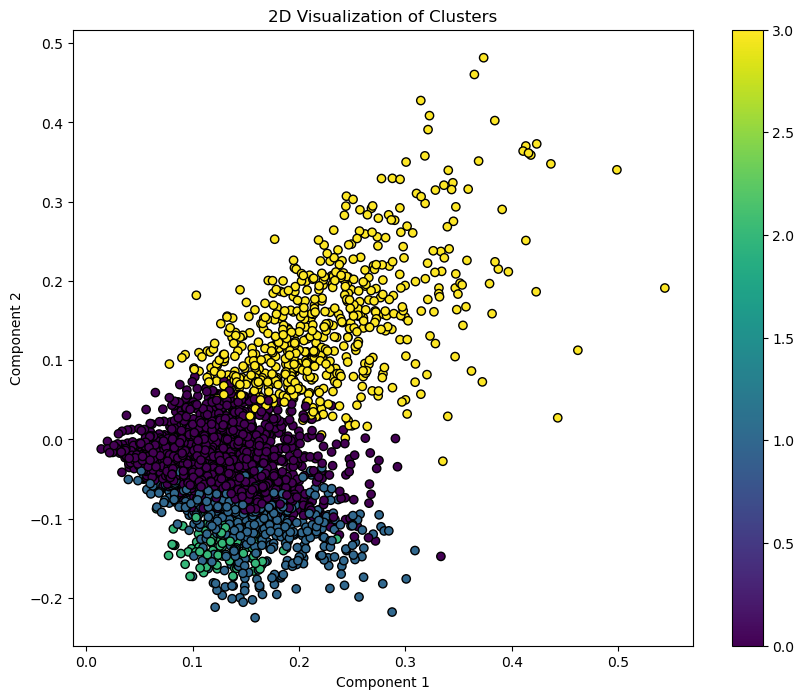

In [6]:
# Step 5: Dimensionality Reduction and Cluster Visualization
# Reducing dimensions for visualization and plot clusters in 2D space

svd = TruncatedSVD(n_components=2, random_state=42)  # Reduce to 2 dimensions for plotting
reduced_data = svd.fit_transform(tfidf_matrix)  # Apply SVD on TF-IDF matrix

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.colorbar()
plt.title("2D Visualization of Clusters")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

/Users/sanskarsrivastava/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanskarsrivastava/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanskarsrivastava/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanskarsrivastava/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

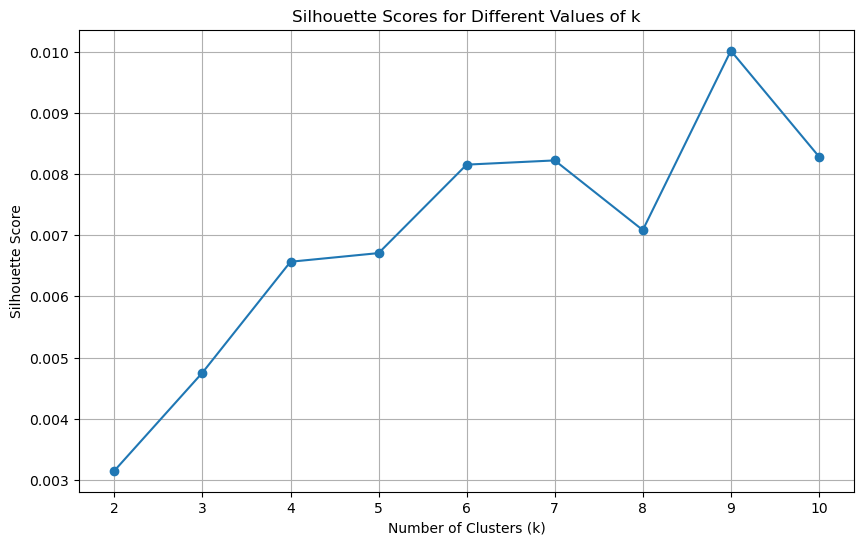

Optimal k based on silhouette score: 9


In [7]:
# Step 6: Silhouette Analysis for Optimal k
# Testing different values of k (from 2 to 10) and calculate silhouette scores to determine the best k

silhouette_scores = [] 
k_values = range(2, 11) 

# Looping through each k, applying K-means, and calculating the silhouette score
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(tfidf_matrix)
    score = silhouette_score(tfidf_matrix, km.labels_)
    silhouette_scores.append(score)

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

# Printing the optimal k based on maximum silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k based on silhouette score: {optimal_k}")

### Optimal Number of Clusters Analysis

**(a) Is the identified optimal \( k \) aligned with the ground truth category information?**

No, the optimal \( k = 9 \) does not align with the ground truth of 4 categories (`sci.med`, `sci.space`, `sci.electronics`, `sci.crypt`).

**(b) If not, discuss potential reasons why the clustering might not perfectly align with the ground truth.**

1. **Subtopics within Categories**: Each category may contain distinct subtopics (e.g., `sci.space` might include space missions, astrophysics, etc.), leading to more clusters.

2. **Overlap Between Categories**: Categories may share similar vocabulary (e.g., technical terms in `sci.electronics` and `sci.space`), causing clusters that don’t strictly follow the original labels.

3. **High Dimensionality and Noise**: Text data is high-dimensional and sparse, so K-means may detect small variations as separate clusters.

4. **K-means Limitations**: K-means assumes spherical clusters, which may not match the true structure of text data.

In [9]:
# Step 7: Evaluation
# Evaluating clustering quality using Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)

ari_score = adjusted_rand_score(target, labels)
nmi_score = normalized_mutual_info_score(target, labels)

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")

# Interpretation of results
print("\nInterpretation:")
print("The ARI and NMI scores indicate how well the clusters align with the true labels.")
print("Higher scores suggest that clusters closely resemble the original categories.")

Adjusted Rand Index (ARI): 0.24387557870538587
Normalized Mutual Information (NMI): 0.425740045506049

Interpretation:
The ARI and NMI scores indicate how well the clusters align with the true labels.
Higher scores suggest that clusters closely resemble the original categories.


### Evaluation of Clustering Performance

- The **ARI** score of 0.2439 indicates a low-to-moderate alignment between the cluster labels and the true categories. An ARI closer to 1 would indicate a perfect match, so this score suggests that the clusters only partially align with the original categories.
  
- The **NMI** score of 0.4257 shows moderate agreement between the clustering and the true labels. NMI values range from 0 (no mutual information) to 1 (perfect alignment), so this score indicates that there is some shared information but it’s not a strong alignment.